In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22,whichday=61,verbose=False):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh and t<=1000:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    elif t>1000:
        B=0.2*np.exp(-(t-1000)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    if verbose==True:
        if t>=whichday and t<=whichday+2:
            print('Il parametro R_0 al giorno ',t,' è pari a',B*S/(gamma*N),'beta=',B)
    
    #erre0=B*S/N/gamma
    #print(erre0)
    
    return dSdt, dIdt, dRdt

### Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365),whichday=61,verbose=False):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh,whichday,verbose))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

### Show the result

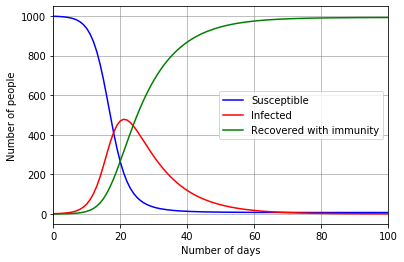

In [4]:
fin_result=time_evo(1000,0.5,10000,0.1,0)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('plotsir05.png',dpi=300)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

# Load italian data

In [5]:
data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

ydata_inf=ydata-ydata_rec-ydata_death

print(data.iloc[-1,0])

data.head()

2020-04-22T17:00:00


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


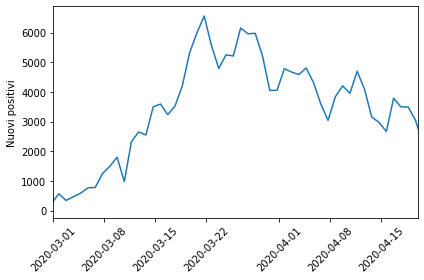

In [6]:
nuovi_positivi=data['nuovi_positivi']
#nuovi_positivi=data['deceduti']

plt.plot(pd.to_datetime(data['data']),nuovi_positivi)
plt.xticks(rotation=45)
plt.xlim('2020-03-01','2020-04-20')
plt.ylabel('Nuovi positivi')
plt.tight_layout()
plt.savefig('output/nuovipositivi.png',dpi=300)
plt.show()

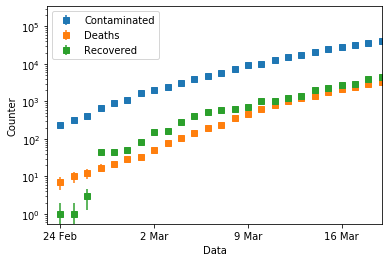

In [7]:
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,70,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
plt.xlim(-1,24)
plt.legend()
plt.savefig('Data only.png',dpi=300)
plt.show()

In [8]:
data.iloc[-1]

data                          2020-04-22T17:00:00
stato                                         ITA
ricoverati_con_sintomi                      23805
terapia_intensiva                            2384
totale_ospedalizzati                        26189
isolamento_domiciliare                      81510
totale_positivi                            107699
variazione_totale_positivi                    -10
nuovi_positivi                               3370
dimessi_guariti                             54543
deceduti                                    25085
totale_casi                                187327
tamponi                                   1513251
casi_testati                          1.01549e+06
note_it                                       NaN
note_en                                       NaN
Name: 58, dtype: object

## Number of deaths

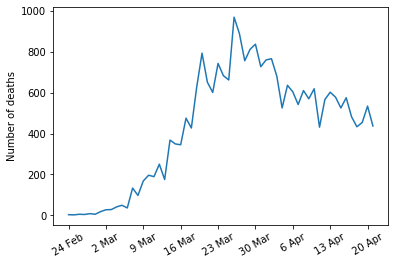

In [9]:
# grafico dei deceduti

deceduti=data['deceduti']

incr_deceduti=[]

for i in range(len(deceduti)-1):
    incr_deceduti.append(deceduti[i+1]-deceduti[i])
    
    
    
plt.plot(incr_deceduti)
#plt.xlabel('Days from the beginning')
plt.ylabel('Number of deaths')
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.savefig('output/deaths.png',dpi=300)
plt.show()

## Ratio infected/n.of tests

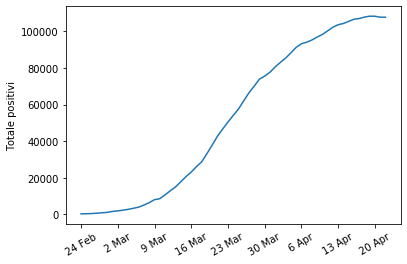

In [10]:
data_tamponi=np.array(data['tamponi'])
data_positivi=np.array(data['totale_positivi'])
tamponi_giornalieri=[data_tamponi[0]]

for i in range(len(data_tamponi)-1):
    tamponi_giornalieri.append(data_tamponi[i+1]-data_tamponi[i])


data_nuovi_positivi=np.array(data['nuovi_positivi'])
plt.plot(data_positivi)
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.ylabel('Totale positivi')
plt.show()

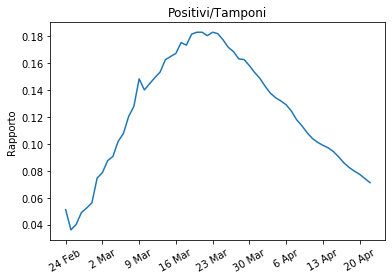

In [11]:
plt.plot(data_positivi/data_tamponi)
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.ylabel('Rapporto')
plt.title('Positivi/Tamponi')
plt.savefig('output/positivi_tamponi.png',dpi=300)
plt.show()

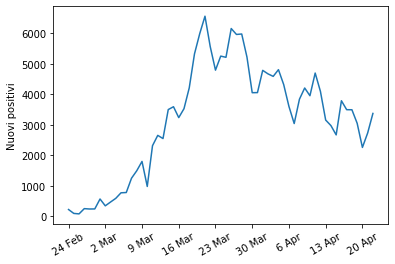

In [12]:
plt.plot(data_nuovi_positivi)
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.ylabel('Nuovi positivi')
plt.show()

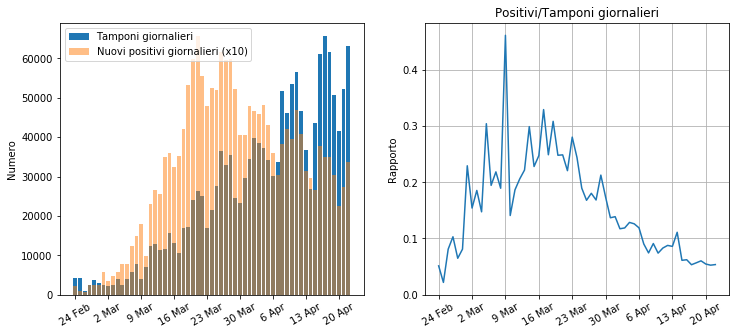

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(np.arange(len(tamponi_giornalieri)),tamponi_giornalieri,label='Tamponi giornalieri')
plt.bar(np.arange(len(tamponi_giornalieri)),data_nuovi_positivi*10,label='Nuovi positivi giornalieri (x10)',alpha=0.5)
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.ylabel('Numero')
#plt.title('Numero di tamponi giornalieri')
plt.legend()
plt.subplot(1,2,2)
plt.plot(data_nuovi_positivi/tamponi_giornalieri)
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.ylabel('Rapporto')
plt.title('Positivi/Tamponi giornalieri')
plt.grid()
plt.savefig('output/tamponi_giornalieri.png',dpi=300)
plt.show()

## normalizing infected people on the number of tests

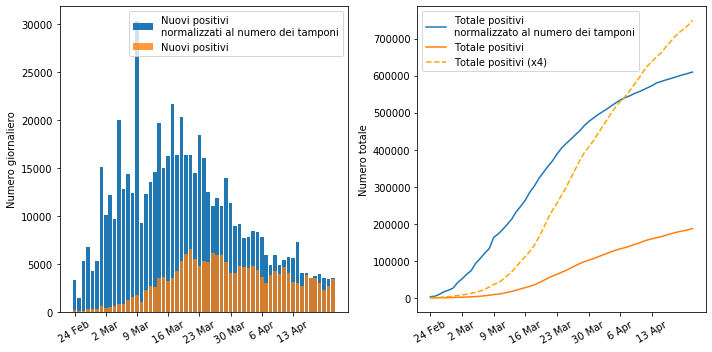

In [14]:
# funzione differenziale
tamponi_giornalieri=np.array(tamponi_giornalieri)
max_tamponi=tamponi_giornalieri.max()
nuovi_positivi_norm=data_nuovi_positivi*max_tamponi/tamponi_giornalieri

# funzione cumulativa
positivi_norm_cum=np.cumsum(nuovi_positivi_norm)
positivi_cum=np.array(np.cumsum(nuovi_positivi))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(np.arange(len(nuovi_positivi_norm)),nuovi_positivi_norm,label='Nuovi positivi \nnormalizzati al numero dei tamponi')
plt.bar(np.arange(len(nuovi_positivi_norm)),nuovi_positivi,label='Nuovi positivi',alpha=0.8)
plt.xticks(np.arange(0,55,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.legend()
plt.ylabel('Numero giornaliero')
plt.subplot(1,2,2)
plt.plot(positivi_norm_cum,label='Totale positivi \nnormalizzato al numero dei tamponi')
plt.plot(positivi_cum,label='Totale positivi')
plt.plot(4*positivi_cum,label='Totale positivi (x4)',color='orange',linestyle='--')
plt.xticks(np.arange(0,55,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.legend()
plt.ylabel('Numero totale')
plt.tight_layout()
plt.savefig('output/infetti_normalizzati.png',dpi=300)
plt.show()

# Comparison between model and data

### optimizer on beta1

The average error is : 6.92 %
28.580000000000155 0.05


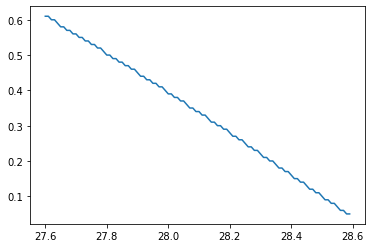

In [15]:
def minimizer_1var(beta1,verbose=False):
    
    fin_result=time_evo(60*10**6,0.415,beta1,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=ydata_inf
    
    pesi=np.exp(-np.arange(len(data_check)))
    pesi=pesi[::-1]
    
    #modello_check=modello_check[len(data_check)-3:len(data_check)]
    #data_check=data_check[len(data_check)-3:len(data_check)]
    
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check*pesi)*100,2)   # media pesata
    #accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    accuracy_real=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2) 
    if verbose==True:
        print('The average error is :',accuracy_real,'%')
    
    return accuracy

minimizer_1var_vec=np.vectorize(minimizer_1var)

beta1grid=np.arange(27.6,28.6,0.01)
beta1y=minimizer_1var_vec(beta1grid)

beta1ideal=beta1grid[np.argmin(beta1y)]

print(beta1ideal,minimizer_1var(beta1ideal,verbose=True))

plt.plot(beta1grid,beta1y)
plt.show()

### model for the italian situation

Il parametro R_0 al giorno  77.79878688973834  è pari a 0.6800474934794875 beta= 0.049449857427189325
Il parametro R_0 al giorno  77.79878688973834  è pari a 0.6800474935696036 beta= 0.049449857427189325


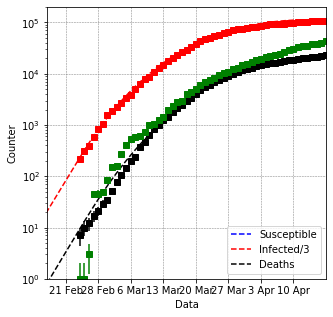

In [16]:
fin_result=time_evo(60*10**6,0.415,beta1ideal,1/14,6.5,t_tresh=17,I0=2,t=np.arange(0,720),whichday=len(xdata)+17,verbose=True)
#fin_result=time_evo(60*10**6,0.41,28,0.0666666,4.88888,t_tresh=17,I0=2,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.figure(figsize=(5,5))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14,70,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr'])
plt.xlim(10,70)
plt.ylim(1,2*10**5)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_v3.png',dpi=300)
plt.show()

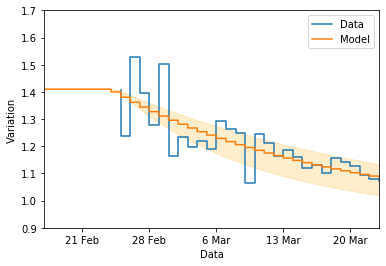

In [17]:
# percentage variation of the contaminted people, compared to the previous day


# data increment
incremento=[]

for i in range(1,len(ydata)):
    incremento.append(ydata_inf[i]/ydata_inf[i-1])
 

# sir increment
incr_SIR=[]

for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])


#general increment (function)

def incr_SIR_fun(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720)):
    fin_result=time_evo(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))
    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]
    
    incr_SIR=[]
    
    for i in range(len(i_vec)-1):
        incr_SIR.append(i_vec[i+1]/i_vec[i])
        
    return np.array(incr_SIR)

# upper and lower limits

beta1h=37
beta1l=18

incr_SIR_high=incr_SIR_fun(60*10**6,0.415,beta1h,1/14,6)
incr_SIR_low=incr_SIR_fun(60*10**6,0.415,beta1l,1/14,6)

    
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,45)
plt.ylim(0.9,1.7)
plt.legend()
plt.savefig('first_derivative_SIR_band_v3.png',dpi=300)
plt.show()

In [18]:
# upper curve

fin_result_high=time_evo(60*10**6,0.415,beta1h,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

t_high=fin_result_high[0]
s_vec_high=fin_result_high[1]
i_vec_high=fin_result_high[2]
r_vec_high=fin_result_high[3]
m_vec_high=fin_result_high[4]


# lower curve

fin_result_low=time_evo(60*10**6,0.415,beta1l,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

t_low=fin_result_low[0]
s_vec_low=fin_result_low[1]
i_vec_low=fin_result_low[2]
r_vec_low=fin_result_low[3]
m_vec_low=fin_result_low[4]

## predictions (best fit)

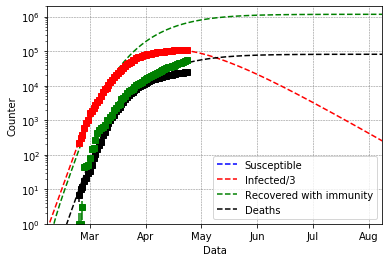

In [19]:
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_prediction_v3.png',dpi=300)
plt.show()

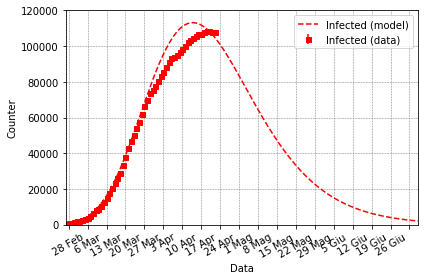

In [20]:
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',markersize=5,label='Infected (data)')
#plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
#plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
#plt.plot(t, m_vec, 'k--', label='Deaths')
#plt.yscale('log')
plt.xticks(np.arange(14,180,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr','24 Apr','1 Mag','8 Mag','15 Mag','22 Mag','29 Mag','5 Giu','12 Giu','19 Giu','26 Giu'],rotation=30)
plt.xlim(20,150)
#plt.yscale('log')
plt.ylim(0,120000)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=1)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/sirdatacomp_prediction_picco.png',dpi=300)
plt.show()

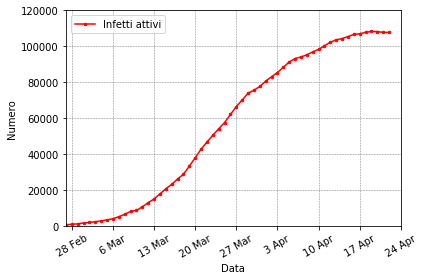

In [21]:
plt.plot(xdata+17,ydata_inf,color='red',marker='.',markersize=5,label='Infetti attivi')
#plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
#plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
#plt.plot(t, i_vec/3, 'r--', label='Infected (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
#plt.plot(t, m_vec, 'k--', label='Deaths')
#plt.yscale('log')
plt.xticks(np.arange(14,180,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr','24 Apr','1 Mag','8 Mag','15 Mag','22 Mag','29 Mag','5 Giu','12 Giu','19 Giu','26 Giu'],rotation=30)
plt.xlim(20,77)
plt.ylim(0,120000)
plt.xlabel('Data')
plt.ylabel('Numero')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/sirdatacomp_prediction_dataonly.png',dpi=300)
plt.show()

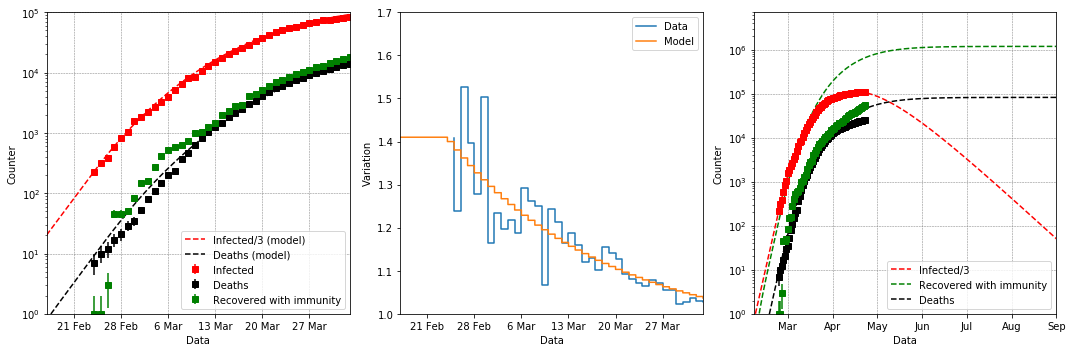

In [22]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar'])
plt.xlim(10,55)
plt.ylim(1,10**5)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar'])
plt.xlim(10,55)
plt.ylim(1,1.7)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/combined_SIR_v3.png',dpi=300)
plt.show()

In [23]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()/3))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec.max()/3*7/100))

Total deaths  81901
Total infected  1260029
Maximum infected  113147
Maximum infected (hospitalized) 22629
Maximum infected (intensive care) 7920


In [24]:
modello_check=i_vec[17:17+len(ydata)]/3
data_check=ydata_inf

accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)

print('dati reali               ',np.array(data_check)[-1])
print('previsioni modello       ',int(np.array(modello_check)[-1]))

print('The accuracy of the model on past data is ',accuracy,'%')

dati reali                107699
previsioni modello        104886
The accuracy of the model on past data is  6.92 %


In [25]:
print(np.array((data_check-modello_check)/data_check*100))

[ -3.77655793  -3.23399898 -15.11263099  -2.64198628   1.19069631
  -2.64054184  10.48021409   0.30913653  -3.56360279  -9.74704682
 -12.96767286 -17.99639532 -12.18799325  -8.19445804  -4.36039201
 -16.9800419  -11.44029423  -8.01526266  -8.09765788  -5.34591561
  -4.19349317  -6.04114367  -6.25210897  -8.42808152  -4.75148002
  -1.91513227   0.27836715  -0.07644924  -0.94028864  -2.14298412
  -3.49209144  -3.01885424  -2.72069346  -3.48104614  -3.81908508
  -6.9560245   -9.11859884  -9.80294383 -10.80689876 -11.66813455
 -11.50607161 -10.9582461  -11.36576574 -12.70616976 -13.3283514
 -13.12418676 -12.86310726 -11.62660484 -10.15113768  -9.09230976
  -8.49172634  -7.16614571  -5.55054869  -4.53760414  -2.86645744
  -1.30845003  -0.03166505   0.96457423   2.61121969]


In [26]:
modello_death_check=m_vec[17:17+len(ydata)]
data_death_check=ydata_death

accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

print('accuracy on deaths',accuracy_death,'%')

accuracy on deaths 31.37 %


### export the file

In [27]:
#export
export = pd.DataFrame({'t':t, 's':s_vec, 'i': i_vec, 'r': r_vec+m_vec})
export.to_csv('output/nazionale.csv',index=False)

### differential rate of infected people

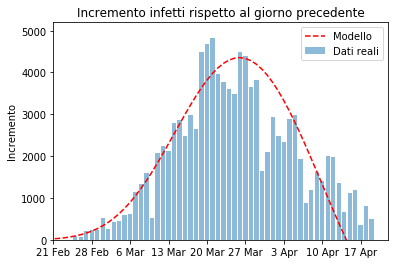

In [28]:
incr_infetti=[]
incr_reali=[]

for i in range(len(i_vec)-1):
    incr_infetti.append(i_vec[i+1]/3-i_vec[i]/3)
    
for i in range(len(ydata_inf)-1):
    incr_reali.append(ydata_inf[i+1]-ydata_inf[i])


plt.bar(xdata[1:]+17,incr_reali,label='Dati reali',alpha=0.5)
plt.plot(t[1:],incr_infetti,label='Modello',color='red',linestyle='--')
plt.xticks(np.arange(14,75,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(14,75)
plt.ylabel('Incremento')
plt.title('Incremento infetti rispetto al giorno precedente')
plt.ylim(0,)
plt.legend()
plt.savefig('output/incremento_sintomatici.png',dpi=300)
plt.show()

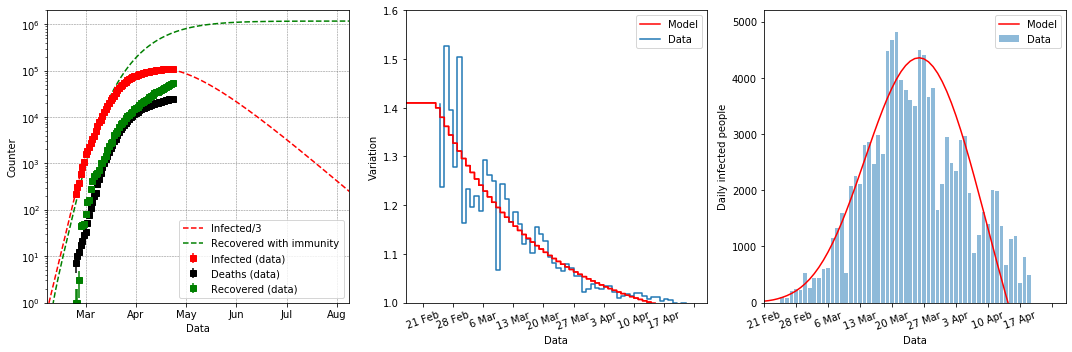

In [29]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
plt.bar(xdata[1:]+17,incr_reali,label='Data',alpha=0.5,color='#1f77b4')
plt.plot(t[1:],incr_infetti,label='Model',color='red')
plt.xticks(np.arange(14,80,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'],rotation=20)
plt.xlim(14,80)
plt.xlabel('Data')
plt.ylabel('Daily infected people')
#plt.title('Incremento infetti rispetto al giorno precedente')
plt.ylim(0,)
plt.legend()
plt.subplot(1,3,2)
plt.step(t[1:],incr_SIR,label='Model',color='red')
plt.step(xdata[xdata>=1]+17,incremento,label='Data',color='#1f77b4')
plt.step(t[1:],incr_SIR,color='red')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,80,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'],rotation=20)
plt.xlim(10,80)
plt.ylim(1,1.6)
plt.legend()
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected (data)')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths (data)')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered (data)')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
#plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,2*10**6)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/combined_SIR_incremento_v3.png',dpi=300)
plt.show()

In [30]:
day_oggi=len(incr_reali)-1
(incr_reali[day_oggi]-incr_infetti[day_oggi+17])/incr_reali[day_oggi]*100

-17733.242397520808

### new plot to export

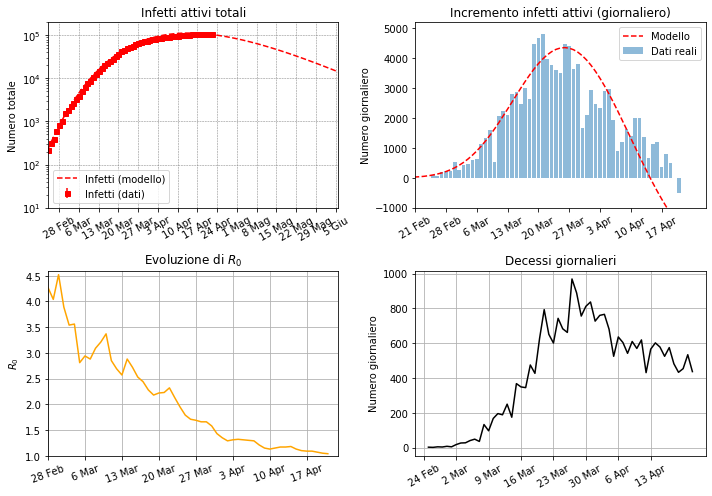

In [31]:
r0data=pd.read_csv('output/r0.csv')

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',markersize=5,label='Infetti (dati)')
plt.plot(t, i_vec/3, 'r--', label='Infetti (modello)')
plt.xticks(np.arange(14,180,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr','24 Apr','1 Mag','8 Mag','15 Mag','22 Mag','29 Mag','5 Giu','12 Giu','19 Giu','26 Giu'],rotation=30)
plt.xlim(17,120)
plt.ylim(10,2*10**5)
plt.yscale('log')
plt.title('Infetti attivi totali')
plt.ylabel('Numero totale')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(2,2,3)
plt.plot(r0data['R0'],color='orange')
plt.xticks(np.arange(0,60,7),['28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'],rotation=20)
plt.xlim(0,len(xdata)-4)
plt.ylabel('$R_0$')
plt.ylim(1,4.6)
plt.grid()
plt.title('Evoluzione di $R_0$')
plt.subplot(2,2,4)
plt.plot(incr_deceduti,color='black')
#plt.xlabel('Days from the beginning')
plt.title('Decessi giornalieri')
plt.ylabel('Numero giornaliero')
plt.xticks(np.arange(-1,55,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.grid()
plt.subplot(2,2,2)
plt.bar(xdata[1:]+17,incr_reali,label='Dati reali',alpha=0.5)
plt.plot(t[1:],incr_infetti,label='Modello',color='red',linestyle='--')
plt.xticks(np.arange(14,75,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'],rotation=30)
plt.xlim(14,80)
plt.ylabel('Numero giornaliero')
plt.title('Incremento infetti attivi (giornaliero)')
plt.ylim(-1000,)
plt.legend()
plt.tight_layout()
plt.savefig('output/newplot.png',dpi=300)
plt.show()

## automatic minimization  (not working)

In [32]:
def minimizer(x):
    
    beta0,beta1,gamma,death_rate=x
    
    fin_result=time_evo(60*10**6,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=(ydata-ydata_rec)
    
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return (accuracy+accuracy_death)/2


minimizer_vec=np.vectorize(minimizer)

In [33]:
minimizer([0.415,28.5,1/14,4.8])

13.96

In [34]:
initial_guess=[0.415,27,1/14,5]

from scipy.optimize import minimize

res=minimize(minimizer,initial_guess)

res.x

array([ 0.415     , 27.        ,  0.07142857,  5.        ])

In [35]:
# brute force (not efficient)

b0_grid=np.linspace(0.41,0.42,10)
b1_grid=np.linspace(27,28,10)
gamma_grid=np.linspace(0.06,0.09,10)
death_rate_grid=np.linspace(4,6,10)

minimo_tab=[]

#for i in b0_grid:
#    print(i)
#    for j in b1_grid:
#        for k in gamma_grid:
#            for l in death_rate_grid:
#                minimo_tab.append([i,j,k,l,minimizer([i,j,k,l])])

In [36]:
#minimo_tab_arr=np.array(minimo_tab)

#position=minimo_tab_arr[:,4].argmin()
#minimo_tab_arr[position]

## predictions with uncertaintites

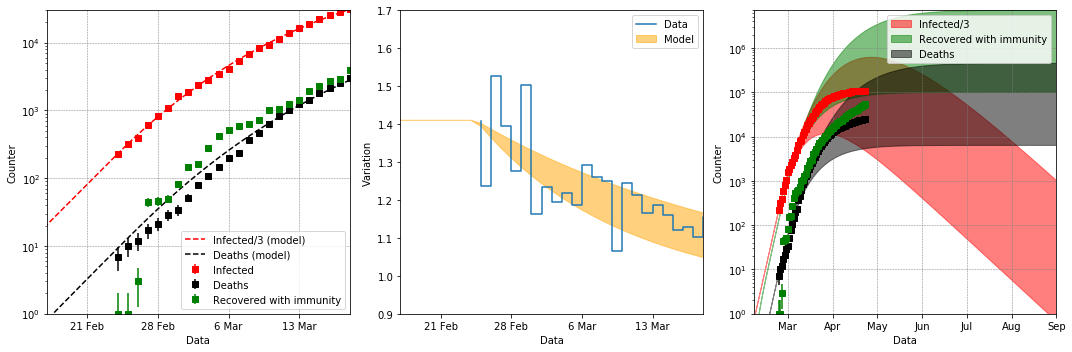

In [37]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,40)
plt.ylim(1,3*10**4)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
#plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.5,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,40)
plt.ylim(0.9,1.7)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.fill_between(t, i_vec_high/3,i_vec_low/3, label='Infected/3',color='red',alpha=0.5)
plt.fill_between(t, r_vec_high,r_vec_low, color='green',alpha=0.5, label='Recovered with immunity')
plt.fill_between(t, m_vec_high,m_vec_low,color='black',alpha=0.5, label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR_band_v3.png',dpi=300)
plt.show()

In [38]:
print('Total deaths ',int(m_vec_low[-1]),'-',int(m_vec_high[-1]))
print('Total infected ',int(m_vec_low[-1]+r_vec_low[-1]),'-',int(m_vec_high[-1]+r_vec_high[-1]))
print('Maximum infected (detected) ',int(i_vec_low.max()/3),'-',int(i_vec_high.max()/3))
print('Maximum infected (hospitalized)',int(i_vec_low.max()/3*20/100),'-',int(i_vec_high.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec_low.max()/3*10/100),'-',int(i_vec_high.max()/3*10/100))

Total deaths  6301 - 447370
Total infected  105029 - 7456177
Maximum infected (detected)  11556 - 611596
Maximum infected (hospitalized) 2311 - 122319
Maximum infected (intensive care) 1155 - 61159


## simulation of unlock on the 15th of April

In [39]:
'''
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh and t<=68:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    elif t>68:
        B=0.415
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    #erre0=B*S/N/gamma
    #print(erre0)
    
    return dSdt, dIdt, dRdt

def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)
'''

'\n# The SIR model differential equations.\ndef deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):\n    S,I,R = y\n\n    if t<=t_tresh:\n        B=beta1\n    elif t>t_tresh and t<=68:\n        B=beta1*np.exp(-(t-t_tresh)/beta2)\n    elif t>68:\n        B=0.415\n    \n    dSdt = -(B*I/N)*S \n    dIdt = (B*S/N)*I - gamma*I \n    dRdt = gamma*I \n    \n    #erre0=B*S/N/gamma\n    #print(erre0)\n    \n    return dSdt, dIdt, dRdt\n\ndef time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):\n    # Definition of the initial conditions\n    # I0 and R0 denotes the number of initial infected people (I0) \n    # and the number of people that recovered and are immunized (R0)\n    \n    # t ise the timegrid\n    \n    S0=N-I0-R0  # number of people that can still contract the virus\n    \n    # Initial conditions vector\n    y0 = S0, I0, R0\n\n    # Integrate the SIR equations over the time grid, t.\n    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))\n    S, 

In [40]:
'''
fin_result=time_evo(60*10**6,0.415,28.05,1/14,6.5,t_tresh=17,I0=13,t=np.arange(0,720))
#fin_result=time_evo(60*10**6,0.41,28,0.0666666,4.88888,t_tresh=17,I0=2,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

ydata_inf=ydata-ydata_rec-ydata_death

plt.figure(figsize=(8,5))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected (Data)')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths (Data)')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered (Data)')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/20, 'r--', label='Infected with symptoms')
plt.plot(t, i_vec, color='orange',linestyle='--', label='Total infected')
plt.plot(t, r_vec, 'g--', label='Recovered + Deaths')
#plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(10,180)
plt.ylim(1,7*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('output/sirdatacomp-nolockdown.png',dpi=300)
plt.show()
'''

"\nfin_result=time_evo(60*10**6,0.415,28.05,1/14,6.5,t_tresh=17,I0=13,t=np.arange(0,720))\n#fin_result=time_evo(60*10**6,0.41,28,0.0666666,4.88888,t_tresh=17,I0=2,t=np.arange(0,720))\n\nt=fin_result[0]\ns_vec=fin_result[1]\ni_vec=fin_result[2]\nr_vec=fin_result[3]\nm_vec=fin_result[4]\n\nydata_inf=ydata-ydata_rec-ydata_death\n\nplt.figure(figsize=(8,5))\nplt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected (Data)')\nplt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths (Data)')\nplt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered (Data)')\nplt.plot(t, s_vec, 'b--', label='Susceptible')\nplt.plot(t, i_vec/20, 'r--', label='Infected with symptoms')\nplt.plot(t, i_vec, color='orange',linestyle='--', label='Total infected')\nplt.plot(t, r_vec, 'g--', label='Recovered + Deaths')\n#plt.plot(t, m_vec, 'k--', label='Deaths')\np

### sir semplice e previsioni future

In [41]:
'''
# The SIR model differential equations.
def deriv_SIR_simple(y, t, N, beta1,gamma,beta2,tau=10**6):
    S,I,R = y
    
    if t<=14:      # il lockdown nazionale inizia al 14° giorno 
        B=beta1
    else: 
        B=beta2*np.exp(-(t-14)/tau)

    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt


def SIR_simple(N,beta1,gamma,beta2,tau=10**6,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv_SIR_simple, y0, t, args=(N,beta1,gamma,beta2,tau))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

'''

'\n# The SIR model differential equations.\ndef deriv_SIR_simple(y, t, N, beta1,gamma,beta2,tau=10**6):\n    S,I,R = y\n    \n    if t<=14:      # il lockdown nazionale inizia al 14° giorno \n        B=beta1\n    else: \n        B=beta2*np.exp(-(t-14)/tau)\n\n    dSdt = -(B*I/N)*S \n    dIdt = (B*S/N)*I - gamma*I \n    dRdt = gamma*I \n    \n    return dSdt, dIdt, dRdt\n\n\ndef SIR_simple(N,beta1,gamma,beta2,tau=10**6,I0=1,R0=0,t=np.arange(0,365)):\n    # Definition of the initial conditions\n    # I0 and R0 denotes the number of initial infected people (I0) \n    # and the number of people that recovered and are immunized (R0)\n    \n    # t ise the timegrid\n    \n    S0=N-I0-R0  # number of people that can still contract the virus\n    \n    # Initial conditions vector\n    y0 = S0, I0, R0\n\n    # Integrate the SIR equations over the time grid, t.\n    ret = odeint(deriv_SIR_simple, y0, t, args=(N,beta1,gamma,beta2,tau))\n    S, I, R = np.transpose(ret)\n    \n    return (t,S,I,R)\

In [42]:
'''
ydata_inf=np.array(ydata_inf)

fin_result_pred=SIR_simple(6*10**7,0.1*0.9,0.1,0.1*0.9,I0=ydata_inf[-1])
t_pred=fin_result_pred[0]
i_vec_pred=fin_result[2]

def disc_pred(R0):
    fin_result=SIR_simple(6*10**7,1/14*R0,1/14,1/14*R0,I0=ydata_inf[-1])
    i_vec=fin_result[2]
    return i_vec

plt.plot(t_pred, disc_pred(0.8), 'r', label='Infected')
plt.legend(loc=5)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('plotsir05.png',dpi=300)
plt.show()

'''

"\nydata_inf=np.array(ydata_inf)\n\nfin_result_pred=SIR_simple(6*10**7,0.1*0.9,0.1,0.1*0.9,I0=ydata_inf[-1])\nt_pred=fin_result_pred[0]\ni_vec_pred=fin_result[2]\n\ndef disc_pred(R0):\n    fin_result=SIR_simple(6*10**7,1/14*R0,1/14,1/14*R0,I0=ydata_inf[-1])\n    i_vec=fin_result[2]\n    return i_vec\n\nplt.plot(t_pred, disc_pred(0.8), 'r', label='Infected')\nplt.legend(loc=5)\nplt.xlim(0,100)\nplt.xlabel('Number of days')\nplt.ylabel('Number of people')\nplt.grid(color='gray', linestyle='-', linewidth=0.5)\nplt.savefig('plotsir05.png',dpi=300)\nplt.show()\n\n"

In [43]:
'''
plt.plot(np.arange(len(ydata_inf)),ydata_inf,color='red',label='Dati reali',marker='.')
plt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.8),'--', label='R0=0.8')
plt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.6), '--', label='R0=0.6')
plt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.4), '--', label='R0=0.4')
plt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.2), '--', label='R0=0.2')
plt.plot(np.zeros(2)+70,[-1000,150000],color='black')
plt.ylabel('Infetti attivi')
plt.xticks(np.arange(0,100,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu'],rotation=30)
#plt.xlim(50,60)
#plt.ylim(100000,110000)
plt.xlim(0,100)
plt.ylim(0,120000)
plt.legend()
plt.title('Andamento degli infetti attivi')
plt.grid()
plt.tight_layout()
plt.savefig('output/andamento-infetti-attivi.png',dpi=300)
plt.show()

'''

"\nplt.plot(np.arange(len(ydata_inf)),ydata_inf,color='red',label='Dati reali',marker='.')\nplt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.8),'--', label='R0=0.8')\nplt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.6), '--', label='R0=0.6')\nplt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.4), '--', label='R0=0.4')\nplt.plot(t_pred+len(ydata_inf)-1, disc_pred(0.2), '--', label='R0=0.2')\nplt.plot(np.zeros(2)+70,[-1000,150000],color='black')\nplt.ylabel('Infetti attivi')\nplt.xticks(np.arange(0,100,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu'],rotation=30)\n#plt.xlim(50,60)\n#plt.ylim(100000,110000)\nplt.xlim(0,100)\nplt.ylim(0,120000)\nplt.legend()\nplt.title('Andamento degli infetti attivi')\nplt.grid()\nplt.tight_layout()\nplt.savefig('output/andamento-infetti-attivi.png',dpi=300)\nplt.show()\n\n"

### advanced optimizer

In [44]:
'''
def optimizer_adv(R0,R02,tau):
    fin_result_updated=SIR_simple(6*10**7,R0*1/14,1/14,R02*1/14,tau,I0=ydata_inf[0])
    i_vec=fin_result_updated[2]
    
    #pesi=np.exp(-np.arange(len(ydata_inf))/7)
    #pesi=pesi[::-1]
    
    accuracy=np.sum((ydata_inf-i_vec[0:len(ydata_inf)])**2)
    errperc=np.mean(np.abs((ydata_inf-i_vec[0:len(ydata_inf)])/ydata_inf))*100
    stdperc=np.std(np.abs((ydata_inf-i_vec[0:len(ydata_inf)])/ydata_inf))*100
    
    return accuracy,errperc,stdperc
    
'''

'\ndef optimizer_adv(R0,R02,tau):\n    fin_result_updated=SIR_simple(6*10**7,R0*1/14,1/14,R02*1/14,tau,I0=ydata_inf[0])\n    i_vec=fin_result_updated[2]\n    \n    #pesi=np.exp(-np.arange(len(ydata_inf))/7)\n    #pesi=pesi[::-1]\n    \n    accuracy=np.sum((ydata_inf-i_vec[0:len(ydata_inf)])**2)\n    errperc=np.mean(np.abs((ydata_inf-i_vec[0:len(ydata_inf)])/ydata_inf))*100\n    stdperc=np.std(np.abs((ydata_inf-i_vec[0:len(ydata_inf)])/ydata_inf))*100\n    \n    return accuracy,errperc,stdperc\n    \n'

In [45]:
import time as pctime

In [46]:
'''
R0grid=np.linspace(4.5,5,20)
R02grid=np.linspace(3,3.5,20)
taugrid=np.linspace(33,35,30)

res_scan=[]
counter=0
counter2=0
cycle_tot=len(R0grid)*len(R02grid)*len(taugrid)

time1=pctime.time()

for r in R0grid:
    for r2 in R02grid:
        for tau in taugrid:
            opt_res=optimizer_adv(r,r2,tau)
            res_scan.append([r,r2,tau,opt_res[0],opt_res[1],opt_res[2]])
            counter=counter+1
            counter2=counter2+1
            if counter2==cycle_tot/10:
                time2=pctime.time()
                remtime=round((time2-time1)/counter*(cycle_tot-counter),1)
                print('completed ',round(counter/cycle_tot*100,1),'%. Remaining time ',remtime,'sec')
                counter2=0
        
res_scan=np.array(res_scan)

'''

"\nR0grid=np.linspace(4.5,5,20)\nR02grid=np.linspace(3,3.5,20)\ntaugrid=np.linspace(33,35,30)\n\nres_scan=[]\ncounter=0\ncounter2=0\ncycle_tot=len(R0grid)*len(R02grid)*len(taugrid)\n\ntime1=pctime.time()\n\nfor r in R0grid:\n    for r2 in R02grid:\n        for tau in taugrid:\n            opt_res=optimizer_adv(r,r2,tau)\n            res_scan.append([r,r2,tau,opt_res[0],opt_res[1],opt_res[2]])\n            counter=counter+1\n            counter2=counter2+1\n            if counter2==cycle_tot/10:\n                time2=pctime.time()\n                remtime=round((time2-time1)/counter*(cycle_tot-counter),1)\n                print('completed ',round(counter/cycle_tot*100,1),'%. Remaining time ',remtime,'sec')\n                counter2=0\n        \nres_scan=np.array(res_scan)\n\n"

In [47]:
'''
df_res_scan=pd.DataFrame(res_scan)
df_res_scan.columns=['R0','R0lock','tau','MSE','mean err%','std err%']

df_res_scan.sort_values(by='MSE')

'''

"\ndf_res_scan=pd.DataFrame(res_scan)\ndf_res_scan.columns=['R0','R0lock','tau','MSE','mean err%','std err%']\n\ndf_res_scan.sort_values(by='MSE')\n\n"

In [48]:
'''

par_ideal=np.array(df_res_scan.sort_values(by='MSE').iloc[0,0:])

par_ideal[0:3]

'''

"\n\npar_ideal=np.array(df_res_scan.sort_values(by='MSE').iloc[0,0:])\n\npar_ideal[0:3]\n\n"

In [49]:
'''
fin_result_updated=SIR_simple(6*10**7,par_ideal[0]*1/14,1/14,par_ideal[1]*1/14,par_ideal[2],I0=ydata_inf[0])

t=fin_result_updated[0]
i_vec=fin_result_updated[2]

plt.figure(figsize=(7,5))
plt.plot(np.arange(len(ydata_inf)),ydata_inf,color='red',linestyle='None',marker='.',label='Infetti attivi (dati)')
plt.plot(t, i_vec, label='Infetti attivi (modello, best-fit)',color='red',linestyle='--')
plt.fill_between(t, i_vec*(1+par_ideal[5]/100*2),i_vec*(1-par_ideal[5]/100*2), label='Infetti attivi (modello, 95% C.L.)',color='red',alpha=.2)
plt.plot(np.zeros(2)+70,[-1000,140000],color='purple')
plt.xticks(np.arange(0,100,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu'],rotation=30)
plt.xlim(0,100)
plt.ylim(0,140000)
plt.annotate("Lockdown", xy=(14,10000), xytext=(3,40000), arrowprops=dict(arrowstyle="->"),fontsize=13)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/fit_con_incertezza.png',dpi=300)
plt.show() 

'''

'\nfin_result_updated=SIR_simple(6*10**7,par_ideal[0]*1/14,1/14,par_ideal[1]*1/14,par_ideal[2],I0=ydata_inf[0])\n\nt=fin_result_updated[0]\ni_vec=fin_result_updated[2]\n\nplt.figure(figsize=(7,5))\nplt.plot(np.arange(len(ydata_inf)),ydata_inf,color=\'red\',linestyle=\'None\',marker=\'.\',label=\'Infetti attivi (dati)\')\nplt.plot(t, i_vec, label=\'Infetti attivi (modello, best-fit)\',color=\'red\',linestyle=\'--\')\nplt.fill_between(t, i_vec*(1+par_ideal[5]/100*2),i_vec*(1-par_ideal[5]/100*2), label=\'Infetti attivi (modello, 95% C.L.)\',color=\'red\',alpha=.2)\nplt.plot(np.zeros(2)+70,[-1000,140000],color=\'purple\')\nplt.xticks(np.arange(0,100,7),[\'24 Feb\',\'2 Mar\',\'9 Mar\',\'16 Mar\',\'23 Mar\',\'30 Mar\',\'6 Apr\',\'13 Apr\',\'20 Apr\',\'27 Apr\',\'4 Mag\',\'11 Mag\',\'18 Mag\',\'25 Mag\',\'1 Giu\'],rotation=30)\nplt.xlim(0,100)\nplt.ylim(0,140000)\nplt.annotate("Lockdown", xy=(14,10000), xytext=(3,40000), arrowprops=dict(arrowstyle="->"),fontsize=13)\nplt.xlabel(\'Data\')\nplt

In [50]:
'''
i_vec[70]*(1+par_ideal[5]/100*2),i_vec[70]*(1-par_ideal[5]/100*2)

#export

t_date=pd.to_datetime(t,unit='D',origin=pd.Timestamp('2020-02-24'))

export_v2 = pd.DataFrame({'date':t_date,'t':t, 'i': i_vec})
export_v2.to_csv('output/nazionale_v2.csv',index=False)

'''

"\ni_vec[70]*(1+par_ideal[5]/100*2),i_vec[70]*(1-par_ideal[5]/100*2)\n\n#export\n\nt_date=pd.to_datetime(t,unit='D',origin=pd.Timestamp('2020-02-24'))\n\nexport_v2 = pd.DataFrame({'date':t_date,'t':t, 'i': i_vec})\nexport_v2.to_csv('output/nazionale_v2.csv',index=False)\n\n"